# MAKING MOVIES AT MICROSOFT

Project Overview.

Microsoft have decided to create a new movies studio and they have no idea anything 
about creating movies.The task is to collect,clean and movie data from different 
sources such as Box offices,IMDB so that we can provide recomendation and insight
to the Head of Microsoft's new movie studio to set up a succesful and profitable
movie studio

Data and Exploration.


The data was provided and I choose two data set from the data provided.I sourced data from internet and retrieved the data through web scrapping.
The provided data set can be can be located from zippedData folder.
The web scrapped data was collected from:
https://www.the-numbers.com/market/genres%20d

In my research and anlysis I will explore and give answer in the following question:

1.What impact of Directors of movies have impact in the production and the sales of movies.

2.What are the most profitable movies and how much shhould invest in movies.

3.which genre is most profitable in the movie industry.

Load Dataset with pandas

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Question1: What impact Directors of movies have in the sales Of movies?

The solution: first will load data and drop missing value contained the dataframe.
Then in movie_datframe will select the column countaining derictor and box_office.
we plot a bar graph of director against the amount in box_office.

In [86]:
movie_dataframe=pd.read_csv("rt.movie_info.tsv.gz",sep='\t')
movie_dataframe.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [87]:
 movie_dataframe1=movie_dataframe.dropna()
 movie_dataframe1.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [88]:
movie_dataframe1['box_office']=movie_dataframe1['box_office'].map(lambda x: x.replace(',',''))

<ipython-input-88-cbb6fa623863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataframe1['box_office']=movie_dataframe1['box_office'].map(lambda x: x.replace(',',''))


In [89]:
movie_dataframe1['box_office']=movie_dataframe1['box_office'].astype(int)

<ipython-input-89-61d3e467c6dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataframe1['box_office']=movie_dataframe1['box_office'].astype(int)


In [90]:

movie_dataframe1.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures


In [91]:
#first I  finds the mean of the sales of movies interms of box_0ffice by Director and then selected top 30 directors in terms of sales
selected_movie_data_frame=movie_dataframe1.groupby(['director'],  as_index=False)['box_office'].mean().sort_values(by='box_office', ascending=False)
best_30_director_box_offiice=selected_movie_data_frame.head(30)

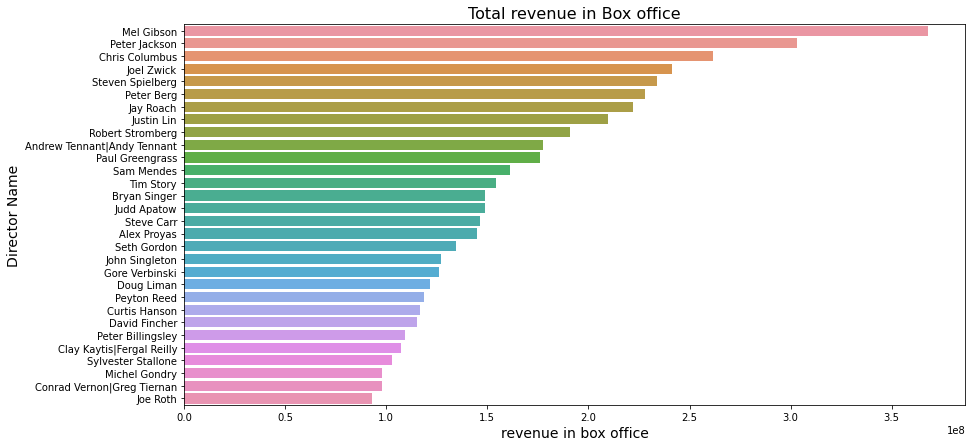

In [92]:
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=best_30_director_box_offiice['box_office'], y=best_30_director_box_offiice['director'])
plt.xlabel('revenue in box office', fontsize=14)
plt.ylabel('Director Name', fontsize=14)
plt.title('Total revenue in Box office', fontsize=16);

Have analysed the most top 30  director from the industry based on the total sale  of the tickets or revenue from box office. From the above analysis I recommend that the Microsoft should hire the best directors in order for the  movies to sale in box office which will eventually  nets to higheer profits.

Question2:What are the most profitable movies and how much should invest in movies?


First load the movie_budget data , clean data reamoving null values ,$ and,from the data frames containing numericals.cconverting some values in row from objects into integers and then will calculate the profit margin by subtracting the world_wide gross from the production_budget  in order to get the profit margin.we will take  25 of the most profitabble movies sample in order to analyze the data.

In [93]:
## load the data set containing movie budgets
movie_budget=pd.read_csv("tn.movie_budgets (1).csv.gz")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [94]:
## removing dollar sign from the below columns
movie_budget['production_budget']=movie_budget['production_budget'].apply(lambda x: x.replace('$',''))
movie_budget['domestic_gross']=movie_budget['domestic_gross'].apply(lambda x: x.replace('$',''))
movie_budget['worldwide_gross']=movie_budget['worldwide_gross'].apply(lambda x: x.replace('$',''))






In [95]:
## Replacing thhe comma with an empty string
movie_budget['production_budget'] = movie_budget['production_budget'].replace({',':''}, regex = True)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].replace({',':''}, regex = True)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].replace({',':''}, regex = True)

In [96]:
## converting  th e strings into  an integer
movie_budget['domestic_gross']=movie_budget['domestic_gross'].astype(int)
movie_budget['production_budget']=movie_budget['production_budget'].astype(int)
movie_budget['worldwide_gross']=movie_budget['worldwide_gross'].astype('int64')

In [97]:
movie_budget.head()
##movie_budget.sort_values (by='worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [98]:
movie_dataframe = movie_budget[movie_budget['domestic_gross'] !=0]

In [99]:
movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']
movie_budget['Net profit'] = movie_budget['profit'] / movie_budget['production_budget']
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,Net profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [100]:
profitable_movie=movie_budget.head(30)

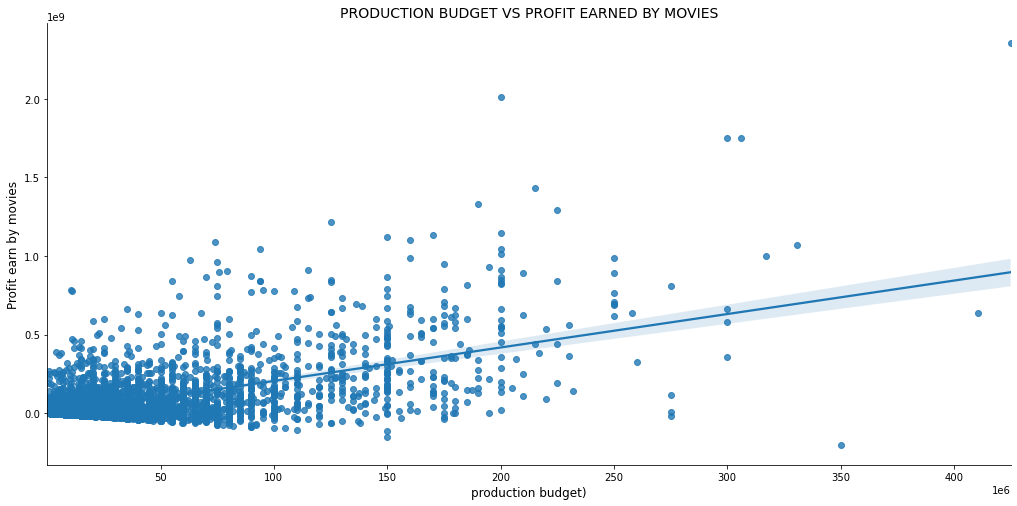

In [101]:
#plot a scatter plot of  profit and production  budget
sns.lmplot(x='production_budget', y='profit', data=movie_budget, height=7, aspect=2)
plt.xlabel('production budget)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit earn by movies', fontsize=12)
plt.title('PRODUCTION BUDGET VS PROFIT EARNED BY MOVIES', fontsize=14);

From the above scatter plot it is positive trend the more you put money in the budget its more likely to generate more profits in the movie.I recoomend that you should put more money in the production budgets in order to generate  more profits.


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


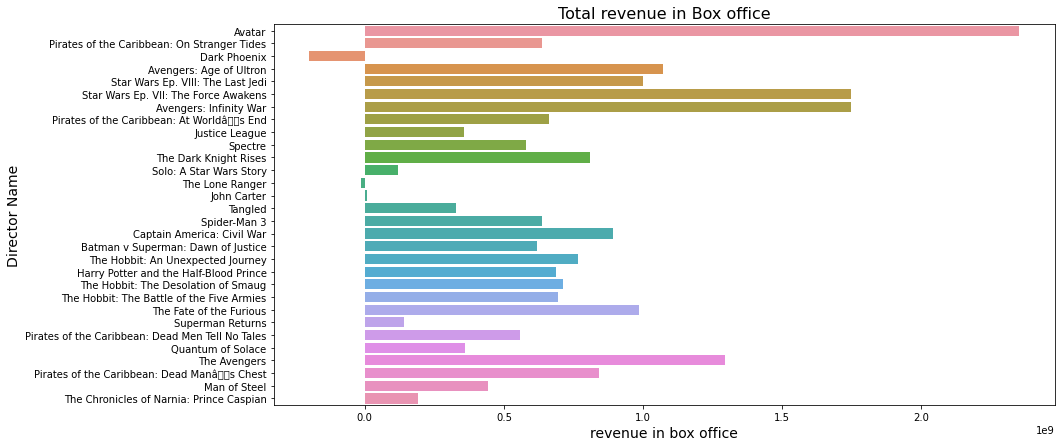

In [127]:
#plot a graphhof movies against the profits to vissualize proitable movies
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=profitable_movie['profit'], y=profitable_movie['movie'])
plt.xlabel('revenue in box office', fontsize=14)
plt.ylabel('Director Name', fontsize=14)
plt.title('Total revenue in Box office', fontsize=16);


from the above anlysis  we hhave been abble to analyse the most succesful movies in terms of the profit.Avatar,Titanic,Avenger are the most succesfull movies because of their profits.I reccomend to the head of Microsot studio to emulate the best practices from the above movies to ensure the succes in movies.

In [103]:
movie_budget.to_csv('moviebudget.csv1')

In [104]:
movie_l=pd.read_csv('bom.movie_gross (1).csv.gz')
movie_l.head(30)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [105]:
movie_l.sort_values (by='foreign_gross',ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1805,Life's a Breeze,Magn.,3500.0,99700,2014
1331,The East,FoxS,2300000.0,99700,2013
302,White Lion,Scre.,NaN,99600,2010
2906,A United Kingdom,FoxS,3900000.0,9900000,2017
510,Le Havre,Jan.,612000.0,9900000,2011
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [106]:
movie_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Question The most profitable genre in the movie industry

first will join two tables and then will calculate the profit mergin

In [107]:
#will import the first table 
movie_l=pd.read_csv('bom.movie_gross (1).csv.gz')
movie_l.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [108]:
##will import the second table
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,Net profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [109]:
##will join the two tables above
movie_merge=pd.merge(movie_l,movie_budget,left_on='title',right_on='movie')
movie_merge.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit,Net profit
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,868879522,4.344398
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642,675524642,4.222029
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673,591244673,3.583301
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828,638102828,9.383865
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389,451156389,2.653861


In [110]:
##I will only use the column movie,studio,production budget,worldwide gross and Genre.The will drops columns that will not use in this analysis
movie_merge.drop(columns = {'title','domestic_gross_x','domestic_gross_y','foreign_gross','year'}, inplace = True)
movie_merge.head(30)

,studio,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit
0,BV,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398
1,WB,38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029
2,P/DW,27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301
3,Sum.,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865
4,Par.,15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861
5,BV,15,"Nov 24, 2010",Tangled,260000000,586477240,326477240,1.255682
6,Uni.,50,"Jul 9, 2010",Despicable Me,69000000,543464573,474464573,6.876298
7,P/DW,30,"Mar 26, 2010",How to Train Your Dragon,165000000,494870992,329870992,1.999218
8,Fox,48,"Dec 10, 2010",The Chronicles of Narnia: The Voyage of the Da...,155000000,418186950,263186950,1.697980
9,Sony,77,"Jun 11, 2010",The Karate Kid,40000000,351774938,311774938,7.794373


Which  are the succesfull studios in the movie industry?

In [111]:
movie_merge.to_csv('moviemerge_studio_csv')

First will determine the profiitability of studio in the movie they make by taking Movie_merge['worldwide_gross] -Movie_merge['production_budget].
Then will have to find percentage profit of studio by taking (movie_merge['profit'] / movie_merge['production_budget]) * 100
Will use groupby to group studio and find the mean.



In [112]:
movie_merge['profit']=movie_merge['worldwide_gross'] - movie_merge['production_budget']
movie_merge['%_profit']=(movie_merge['profit'] / movie_merge['production_budget']) * 100
movie_merge.head()


,studio,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit,%_profit
0,BV,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398,434.439761
1,WB,38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029,422.202901
2,P/DW,27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301,358.330105
3,Sum.,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865,938.386512
4,Par.,15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861,265.386111


In [113]:
profit_by_movie_studio=movie_merge.groupby('studio').mean()
profit_by_movie_studio.head()

,id,production_budget,worldwide_gross,profit,Net profit,%_profit
studio,,,,,,
3D,31.000000,5.000000e+06,1.651520e+07,1.151520e+07,2.303041,230.304060
A24,48.095238,6.814286e+06,1.904788e+07,1.223359e+07,3.242422,324.242218
ALP,52.000000,2.600000e+07,2.923959e+06,-2.307604e+07,-0.887540,-88.754004
ATO,32.000000,1.250000e+07,2.272186e+06,-1.022781e+07,-0.818225,-81.822512
Affirm,53.500000,3.500000e+06,1.573575e+07,1.223575e+07,3.038448,303.844830


Text(0.5, 1.0, 'Average Profit by Studio')

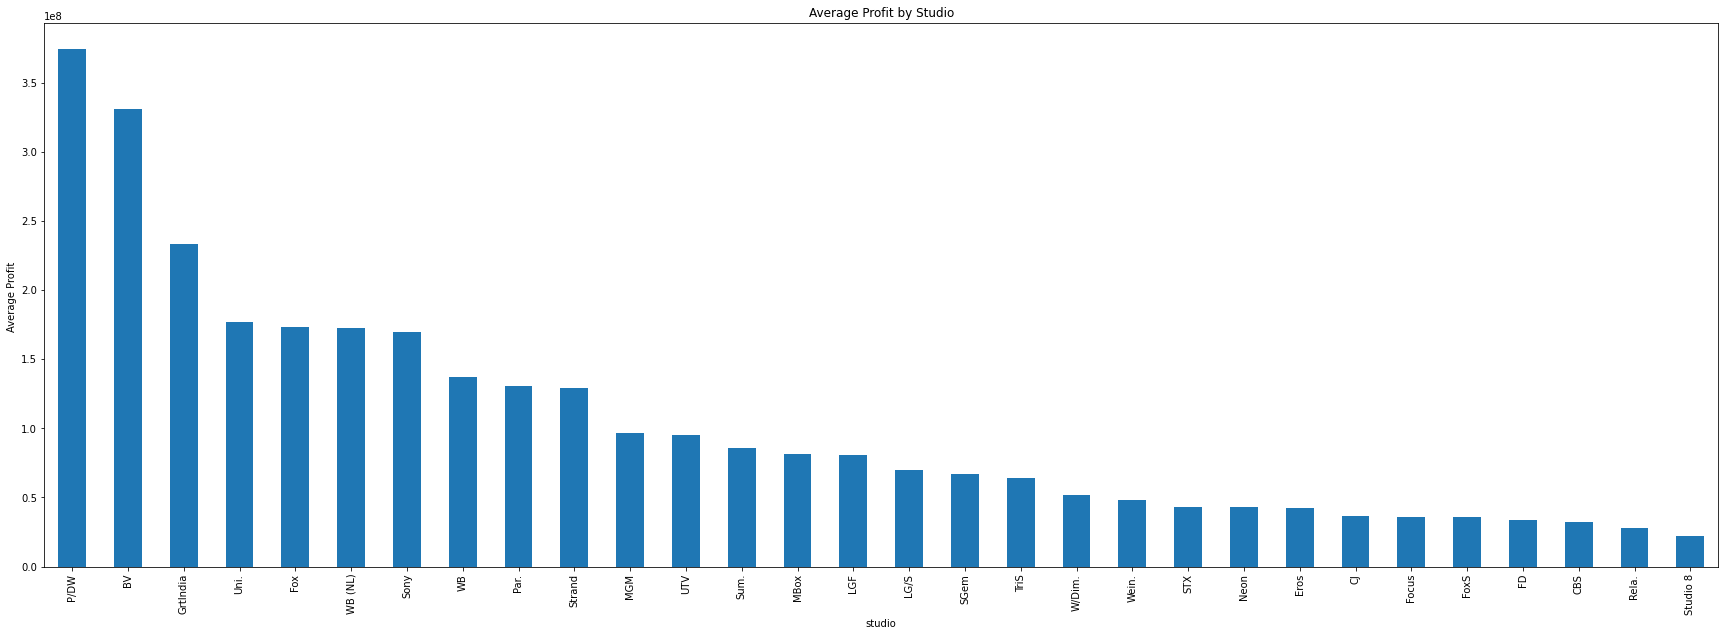

In [114]:
profit_by_movie_studio = profit_by_movie_studio.groupby(['studio'])['profit'].mean()

profit_by_movie_studio = profit_by_movie_studio.sort_values(ascending=False).head(30)

profit_by_movie_studio.plot.bar(figsize=(30,10))

plt.ylabel('Average Profit ')
plt.title('Average Profit by Studio')

Recommendation:That from the data above I recomend is to employ best practices to equivalent to top 10 studios by avarage profit.

Question3:Which genre are thhe most productive in the movie indusrty in terms of profits?

In [115]:
movie_l.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


to find the most productive genres in thhe movies will merge three tables from thhe dataset

In [116]:
tittle_basics=pd.read_csv('imdb.title.basics.csv.gz')
tittle_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [117]:
movie_l=pd.read_csv('bom.movie_gross (1).csv.gz')
movie_l.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [118]:
movie_genre_merge=pd.merge(movie_l,tittle_basics,left_on='title',right_on='primary_title')
movie_genre_merge.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


In [119]:
movie_genre_merge.drop(columns = {'tconst','primary_title','original_title','start_year'}, inplace = True)
movie_genre_merge.head()

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,124.0,"Action,Adventure,Sci-Fi"


In [120]:
movie_genre_budget=pd.merge(movie_genre_merge,movie_budget,left_on='title',right_on='movie')
movie_genre_budget.head()

,title,studio,domestic_gross_x,foreign_gross,year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit,Net profit
0,Toy Story 3,BV,415000000.0,652000000,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,868879522,4.344398
1,Inception,WB,292600000.0,535700000,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,160000000,292576195,835524642,675524642,4.222029
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673,591244673,3.583301
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828,638102828,9.383865
4,Iron Man 2,Par.,312400000.0,311500000,2010,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389,451156389,2.653861


In [121]:
movie_genre_budget.drop(columns = {'title','domestic_gross_x','domestic_gross_y','foreign_gross','year'}, inplace = True)
movie_genre_budget.head()

,studio,runtime_minutes,genres,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit
0,BV,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398
1,WB,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029
2,P/DW,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301
3,Sum.,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865
4,Par.,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861


In [122]:
movie_genre_budget.to_csv('movie_genre_budget.csv')

In [123]:
movie_genre_budget['profit']=movie_genre_budget['worldwide_gross'] - movie_genre_budget['production_budget']
movie_genre_budget['profit_magirn']=movie_genre_budget['profit'] / movie_genre_budget['production_budget']
movie_genre_budget['%_profitt']= movie_genre_budget['profit_magirn'] * 100
movie_genre_budget.head()

,studio,runtime_minutes,genres,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit,profit_magirn,%_profitt
0,BV,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398,4.344398,434.439761
1,WB,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029,4.222029,422.202901
2,P/DW,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301,3.583301,358.330105
3,Sum.,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865,9.383865,938.386512
4,Par.,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861,2.653861,265.386111


In [124]:
movie_genre_budget.sort_values (by='profit',ascending=False)

,studio,runtime_minutes,genres,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit,profit_magirn,%_profitt
1480,BV,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000,2048134200,1748134200,5.827114,5.827114,582.711400
933,Uni.,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,1648854864,1433854864,6.669092,6.669092,666.909239
934,Uni.,137.0,"Action,Crime,Thriller",67,"Apr 3, 2015",Furious 7,190000000,1518722794,1328722794,6.993278,6.993278,699.327786
1481,BV,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",Black Panther,200000000,1348258224,1148258224,5.741291,5.741291,574.129112
1482,Uni.,128.0,"Action,Adventure,Sci-Fi",13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,1305772799,1135772799,6.681016,6.681016,668.101646
...,...,...,...,...,...,...,...,...,...,...,...,...
1078,Uni.,133.0,"Action,Crime,Thriller",47,"Jan 16, 2015",Blackhat,70000000,19665004,-50334996,-0.719071,-0.719071,-71.907137
665,Uni.,96.0,"Action,Adventure,Comedy",55,"Jul 19, 2013",R.I.P.D.,130000000,79076678,-50923322,-0.391718,-0.391718,-39.171786
1392,Par.,104.0,"Action,Adventure,Comedy",81,"Jan 13, 2017",Monster Trucks,125000000,61642798,-63357202,-0.506858,-0.506858,-50.685762
139,Free,110.0,"Action,Family,Fantasy",79,"Nov 24, 2010",The Nutcracker in 3D,90000000,20466016,-69533984,-0.772600,-0.772600,-77.259982


In [125]:
profit_by_movie_genre=movie_genre_budget.groupby('genres').mean()
profit_by_movie_genre.head()

,runtime_minutes,id,production_budget,worldwide_gross,profit,Net profit,profit_magirn,%_profitt
genres,,,,,,,,
Action,111.000000,59.900000,3.232000e+07,9.732942e+07,6.500942e+07,4.133705,4.133705,413.370459
"Action,Adventure",103.000000,54.000000,4.500000e+06,1.177400e+04,-4.488226e+06,-0.997384,-0.997384,-99.738356
"Action,Adventure,Animation",100.000000,48.076923,1.300000e+08,4.779544e+08,3.479544e+08,2.220638,2.220638,222.063829
"Action,Adventure,Biography",124.666667,39.000000,9.000000e+07,2.268429e+08,1.368429e+08,1.166277,1.166277,116.627656
"Action,Adventure,Comedy",112.411765,42.647059,1.027647e+08,4.358324e+08,3.330677e+08,3.375817,3.375817,337.581710


Text(0.5, 1.0, 'Average Profit by genre')

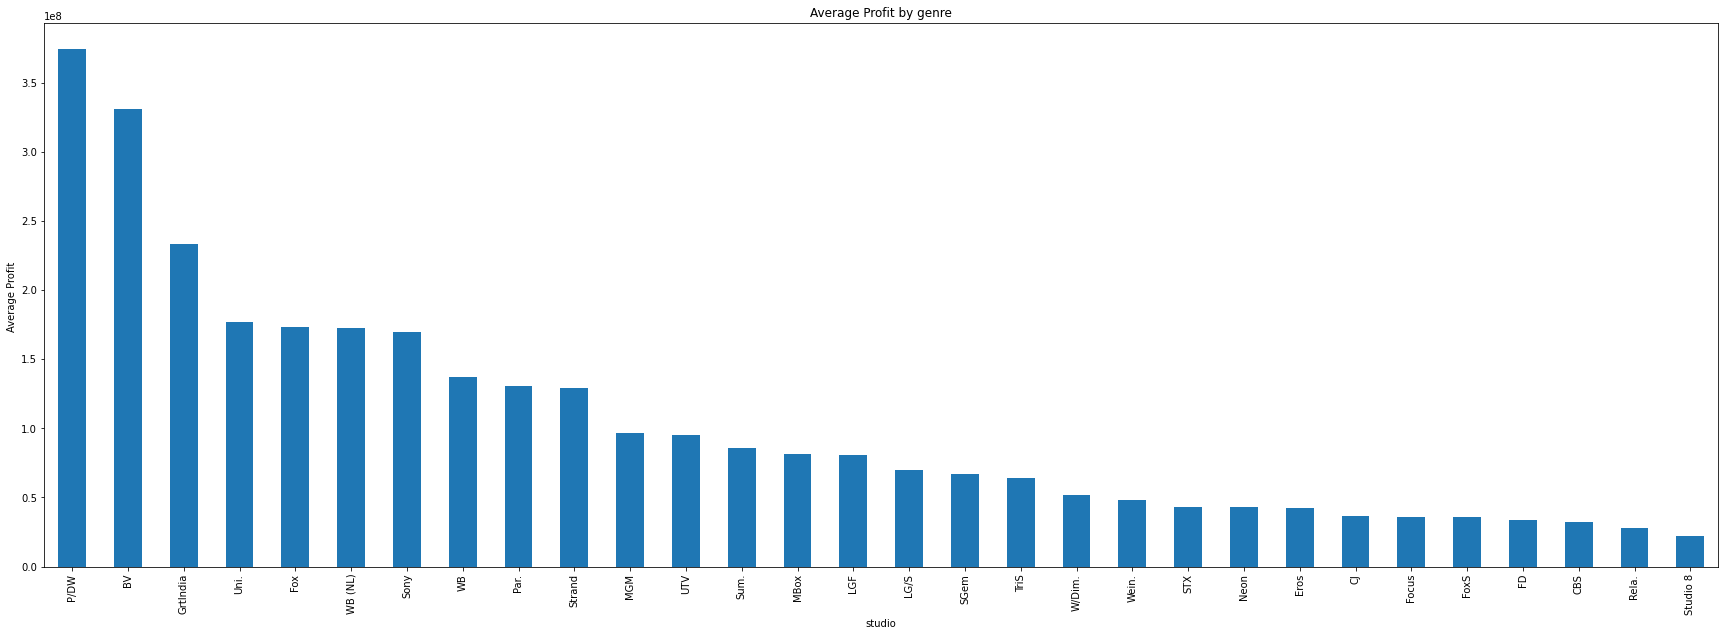

In [126]:
profit_by_movie_genre = profit_by_movie_genre.groupby(['genres'])['Net profit'].mean()

profit_by_movie_genre = profit_by_movie_genre.sort_values(ascending=False).head(30)

profit_by_movie_studio.plot.bar(figsize=(30,10))

plt.ylabel('Average Profit ')
plt.title('Average Profit by genre')

Recommendation: From the data above we have analysed the most profitable genres in movie industry.I recommend that the Microsoft Studio should  produce movies in the top 10 genres from above data in order to generate high profits.